In [1]:
import random as r
import math as m
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

from PIL import Image

In [2]:
class Complex:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __str__(self):
        return '(%s + %s i)' %(self.a, self.b)

    def __repr__(self):
        return self.__str__()

    def _complex_eq(self, other):
        if other.a == self.a and other.b == self.b:
            return True
        else:
            return False

    def _coerce(self, other):  # -> Complex
        if type(other) == int:
            other = Complex(other,0)
        elif type(other) == float:
            other = Complex(other, 0)
        return other

    def __eq__(self, other):
        other = self._coerce(other)
        return self._complex_eq(other)

    def __radd__(self, other):
        return self.__add__(other)

    def __add__(self, other):   # operations only defined for Complex , #number -> Complex
        other = self._coerce(other)
        if type(other) == Complex:
            x = other.a + self.a
            y = other.b + self.b
            return Complex(x,y)

    def __rsub__(self, other):
        self.__sub__(other)

    def __sub__(self, other):
        other = self._coerce(other)
        if type(other) == Complex:
            x = self.a - other.a
            y = self.b - other.b
            return Complex(x, y)

    def __mul__(self, other):
        other = self._coerce(other)
        if type(other) == Complex:
            x = other.a*self.a - other.b*self.b
            y = other.a*self.b + other.b*self.a
            return Complex(x, y)
        
    __rmul__ = __mul__

    @property     # to prevent infinite recursion
    def con(self):
        return Complex(self.a, -self.b)

    @property  # to prevent infinite recursion
    def mag(self):
        return (self*self.con).a

    @property
    def recip(self):
        return self.con/self.mag

    def __truediv__(self, other):
        other = self._coerce(other)
        if type(other) == Complex:
            r = other.mag
            x = (other.a * self.a + other.b * self.b)/r
            y = (other.a * self.b - other.b * self.a)/r
            return Complex(x, y)

    def __pow__(self, power, modulo=None):
        x = 1
        for _ in range(0,power):
            x = self * x
        return x


def T(x):
    result = 1.0
    for i in range(10,0,-1):
        result = 1 + x*result/i
    return result


def exp(x):
    if x==0:
        return 1
    r = m.ceil(abs(x))
    return T(x/r)**r

In [4]:
# ======== COLORMAP ========
cm_hot = get_cmap('plasma')
cm_twilight = get_cmap('twilight')
cm_twilight_shifted = get_cmap('twilight_shifted')

In [6]:
'''
STORE INTERESTING COORDINATES HERE
x_range=(-1.375,-1.325), y_range=(0.06,0.08)
x_range=(-1.346,-1.334), y_range=(0.057,0.072), max_iterations=360
x_range=(-1.5,-1.35), y_range=(-0.05,0.05), max_iterations=260
'''

'\nSTORE INTERESTING COORDINATES HERE\nx_range=(-1.375,-1.325), y_range=(0.06,0.08)\nx_range=(-1.346,-1.334), y_range=(0.061,0.073), max_iterations=160\n'

In [20]:
def iterate(c, max_iterations=25):
    z = c
    i = 0
    for _ in range(max_iterations):
        if z.mag > 4:
            return i
        z = z**2 + c
        i+=1
    return i

def create_domain(x_res, x_range=(-2,2), y_range=(-2,2)): # create (x_res, y_res) array
    x_dist = x_range[1] - x_range[0]
    y_dist = y_range[1] - y_range[0]
    y_res = int((y_dist/x_dist)*x_res)
    x_step = x_dist/x_res
    y_step = y_dist/y_res
    
    domain = [[Complex(x_range[0] + x_step*j, y_range[1]- y_step*i) for j in range(0,x_res + 1)] for i in range(0,y_res + 1)]

    return domain

def create_mandelbrot(x_res=600, x_range=(-2,2), y_range=(-2,2), max_iterations=20, norm=True):
    domain = create_domain(x_res, x_range=x_range, y_range=y_range)
    if norm:
        mandelbrot = [[iterate(b, max_iterations=max_iterations)/max_iterations for b in a] for a in domain]
    else:
        mandelbrot = [[iterate(b, max_iterations=max_iterations) for b in a] for a in domain]
    #plt.imshow(mandelbrot)
    return mandelbrot
    #plt.ylim(y_range)

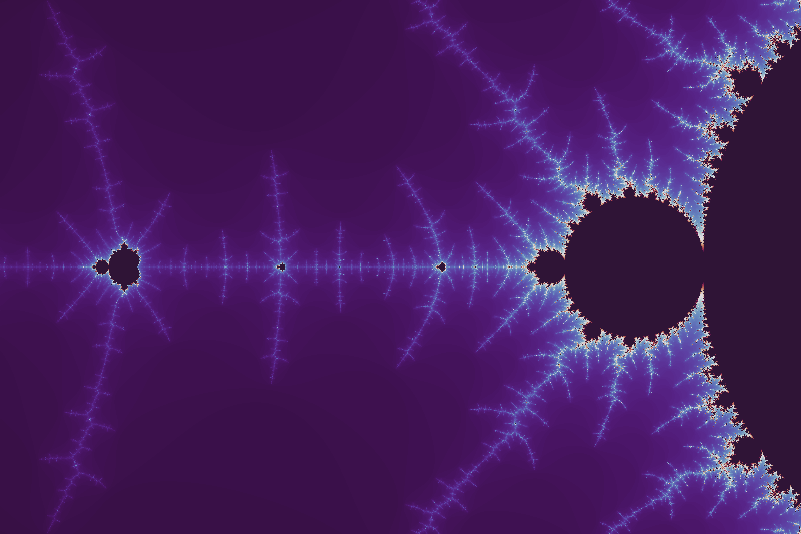

In [17]:
mandelbrot = create_mandelbrot(x_res=800, x_range=(-1.5,-1.35), y_range=(-0.05,0.05), max_iterations=260)
mandelbrot_array = cm_twilight_shifted(np.asarray(mandelbrot))*255
mandelbrot_set = Image.fromarray(mandelbrot_array.astype('uint8'))  #range 0-255
mandelbrot_set

In [91]:
m = np.asarray(mandelbrot)*260
m = m.astype('uint8')

def step(x, max_iterations):
    if x == max_iterations:
        return x-1
    else:
        return x
step = np.vectorize(step)

def reconstruct_set(s, max_iterations):
    iteration = max_iterations
    reconstructed_sets = [s]
    
    for _ in range(max_iterations):
        s = step(s, iteration) 
        reconstructed_sets.append(s)
        iteration-=1
    
    return np.asarray(reconstructed_sets)

reconstructed_mandelbrot = reconstruct_set(m, 260)
reconstructed_mandelbrot.shape

(261, 534, 801)

In [133]:
arr_imgs = []
for i in range(259,99, -1):
    arr = cm_twilight_shifted(reconstructed_mandelbrot[i]/(260-i))*255
    arr_img = Image.fromarray(arr.astype('uint8'))
    arr_img.save('./mandelbrot_imgs/iterations_{}.png'.format(260-i))

In [18]:
mandelbrot_set.save('./mandelbrot_imgs/mandelbrot6.png')

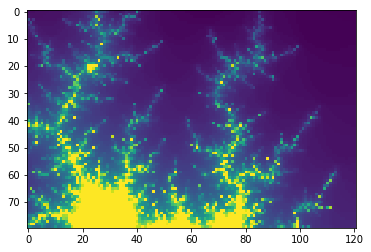

In [37]:
plt.imshow(mandelbrot)